In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [1]:
import pandas as pd 

data= pd.read_csv(r"C:\Users\YAMINI RAVICHANDRAN\OneDrive\ドキュメント\Passenger Satisfaction\Passenger_Satisfaction.csv")
data.head(2)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

<Figure size 1000x600 with 0 Axes>

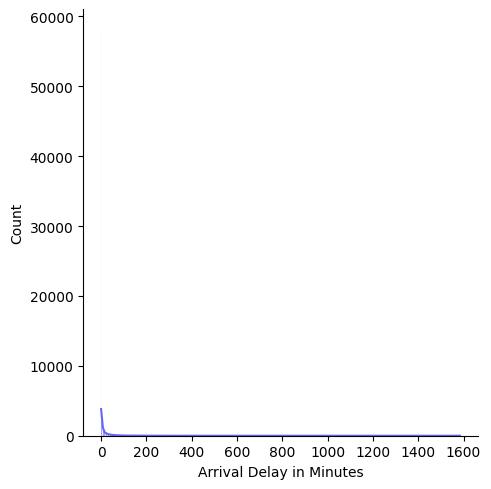

In [6]:
plt.figure(figsize = (10,6))
sns.displot(data=data,x='Arrival Delay in Minutes',kde=True,color='#6666FF')

In [7]:
fill_list = data['Arrival Delay in Minutes'].dropna()
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))
# airline['Arrival Delay'].fillna(airline['Departure Delay'], inplace = True)


<Figure size 1000x600 with 0 Axes>

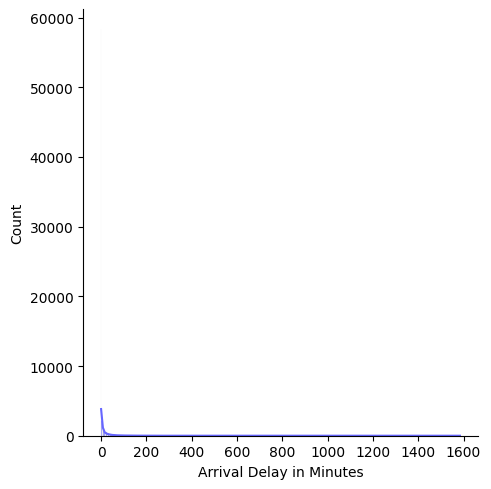

In [8]:
plt.figure(figsize = (10,6))
sns.displot(data=data,x='Arrival Delay in Minutes',kde=True,color='#6666FF')


In [9]:
data.isnull().sum()


Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

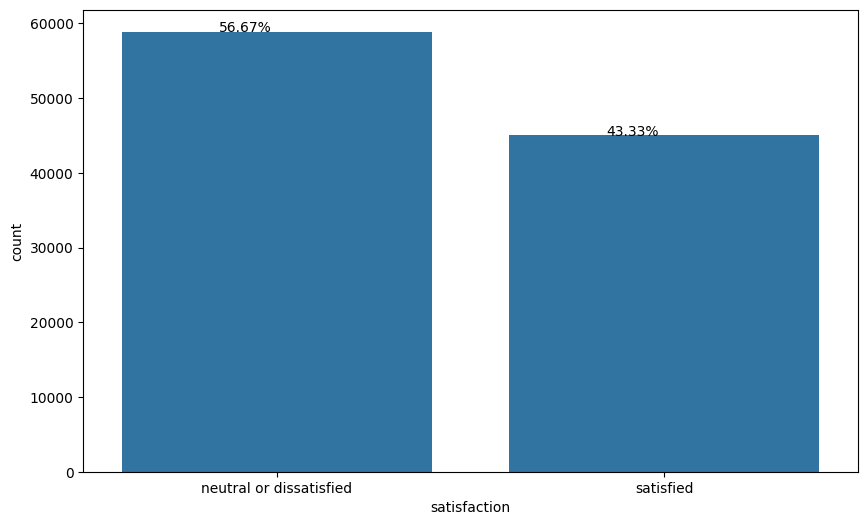

In [11]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=data,x='satisfaction')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/data.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()


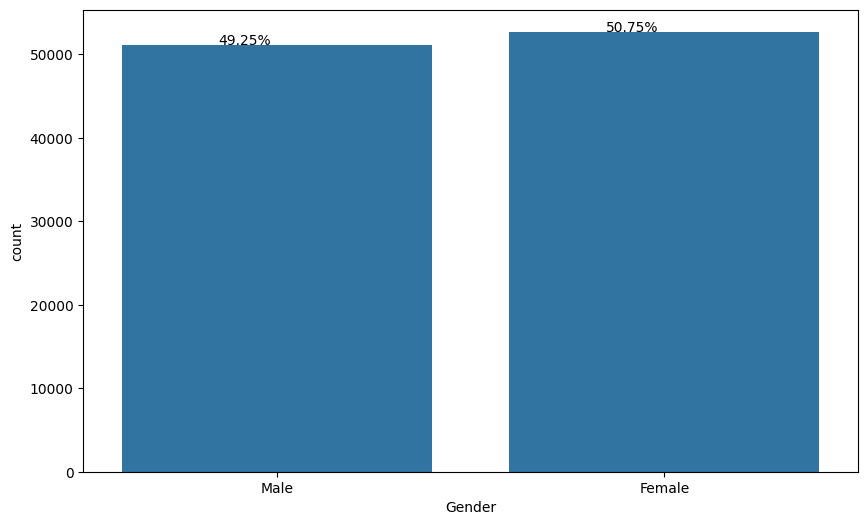

In [12]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=data,x='Gender')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/data.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

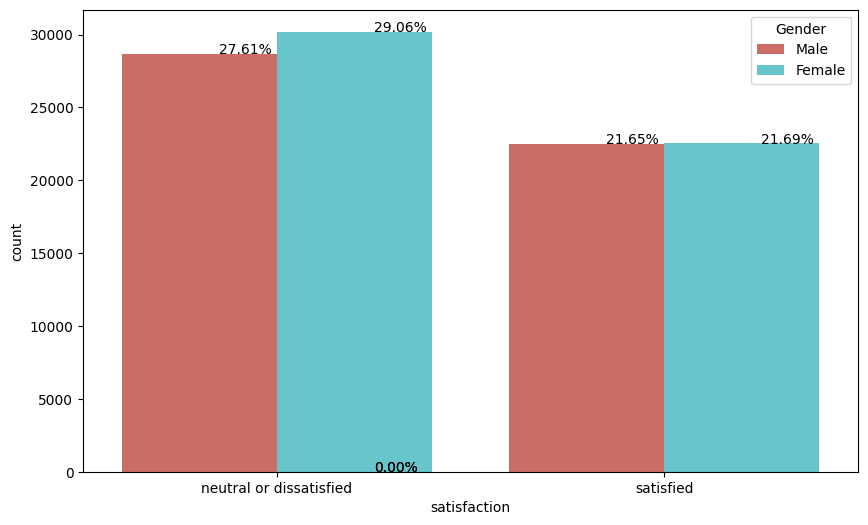

In [14]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=data,x='satisfaction',hue='Gender',palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/data.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

<Axes: xlabel='Customer Type', ylabel='count'>

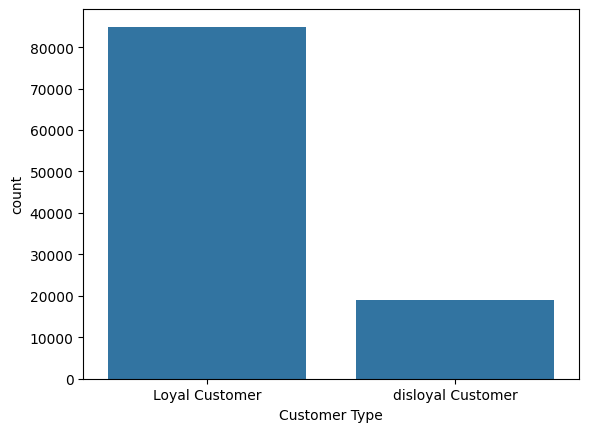

In [15]:
sns.countplot(data=data,x='Customer Type')


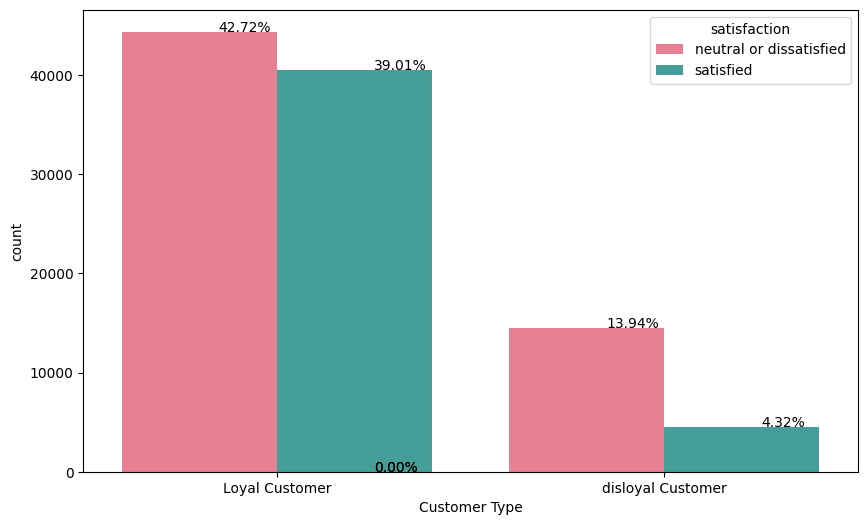

In [17]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=data,x='Customer Type',hue='satisfaction',palette='husl')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/data.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

<Figure size 1000x600 with 0 Axes>

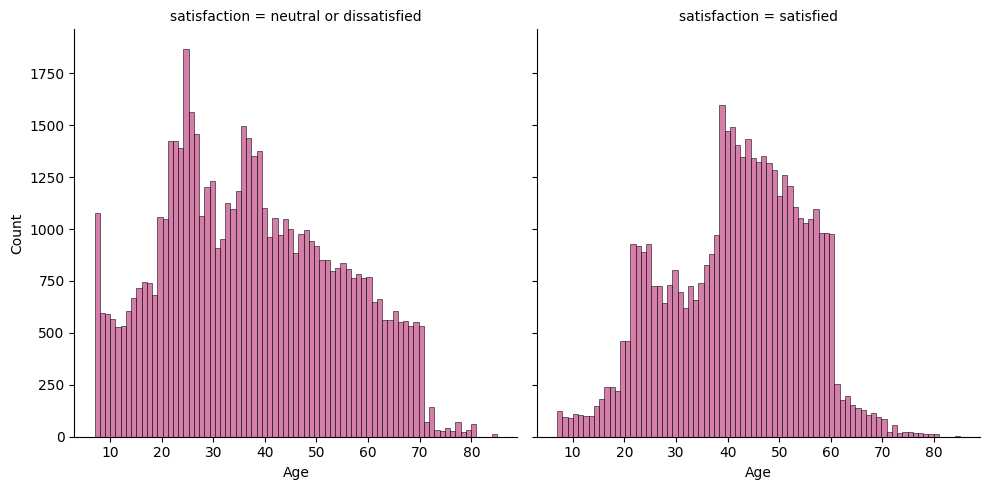

In [18]:
plt.figure(figsize = (10,6))
sns.displot(data=data,x='Age',col='satisfaction',color='#c6538c')
plt.show()

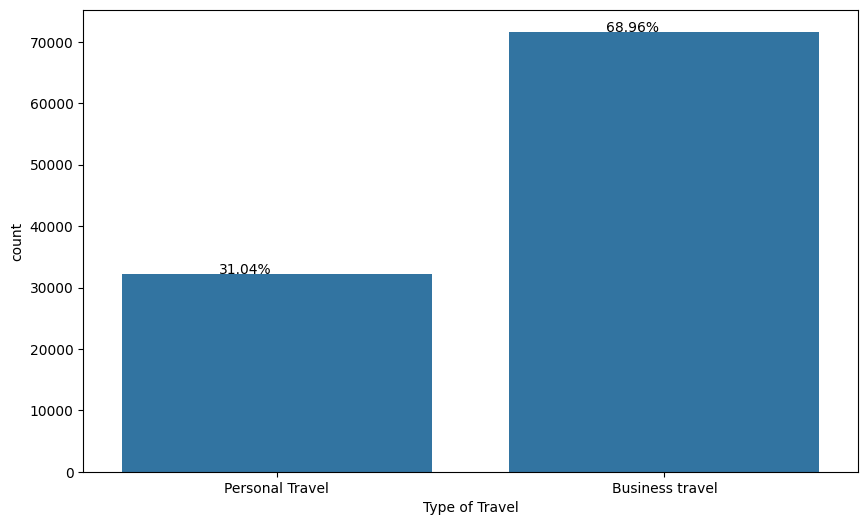

In [19]:
plt.figure(figsize = (10,6))
x=sns.countplot(data=data,x='Type of Travel')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/data.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

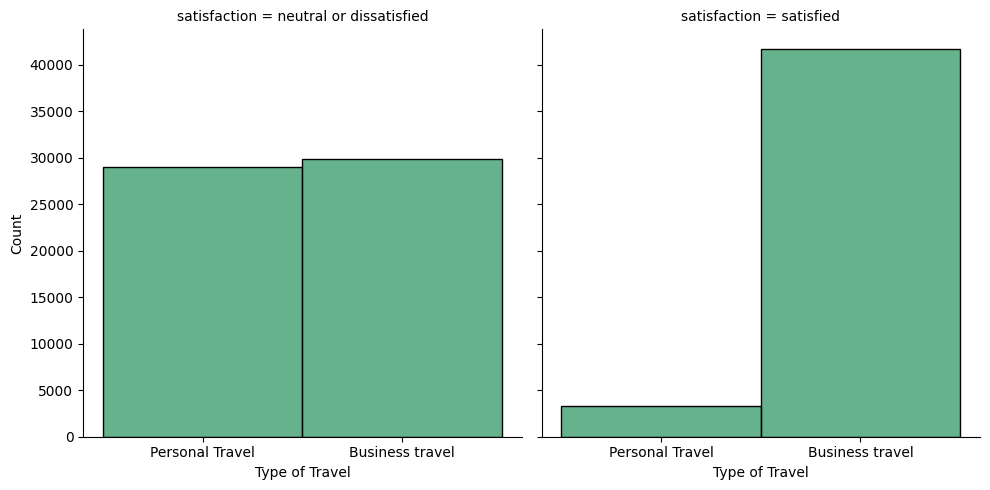

In [21]:
sns.displot(data=data,x='Type of Travel',col='satisfaction',color='#339966')


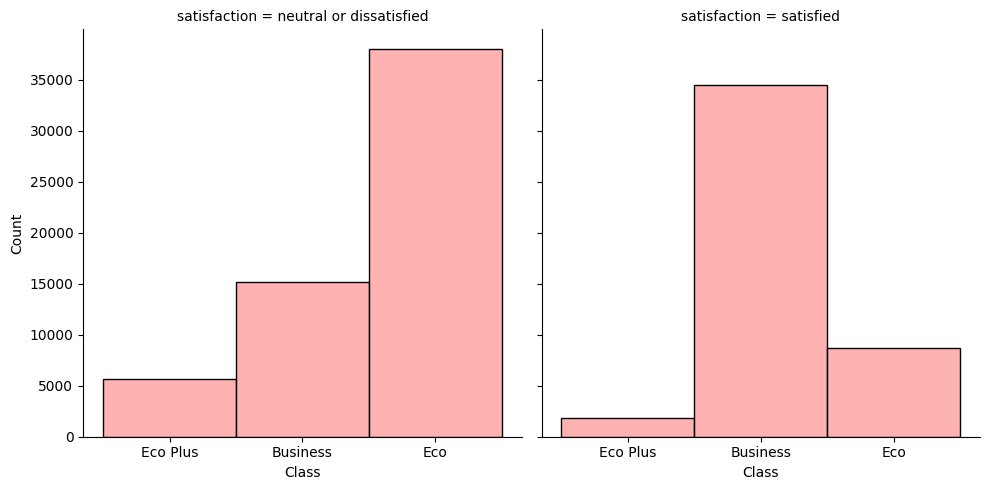

In [24]:
sns.displot(data=data,x='Class',col='satisfaction',color='#ff9999')


In [25]:
data.columns


Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

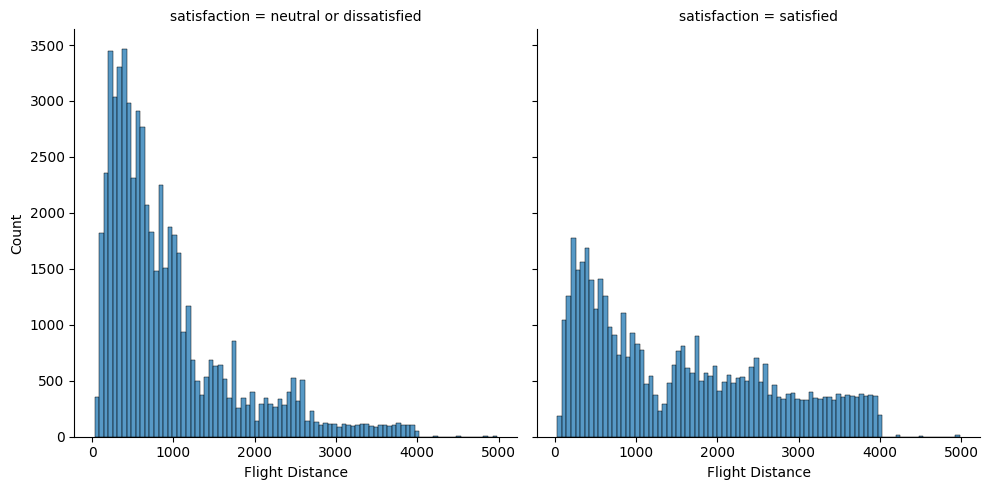

In [26]:
sns.displot(data=data,x='Flight Distance',col='satisfaction')


C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_13208\1174980475.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['satisfaction'] == 'neutral or dissatisfied'), 'Arrival Delay in Minutes'] , color='r',shade=True)
C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_13208\1174980475.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['satisfaction'] == 'satisfied'),'Arrival Delay in Minutes'] , color='b',shade=True)


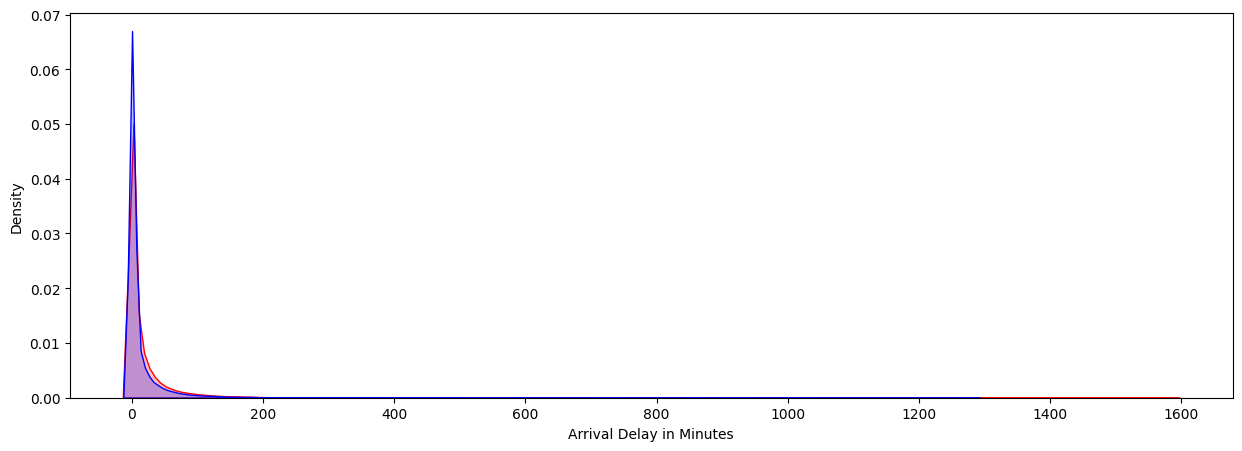

In [27]:
fig = plt.figure(figsize=(15,5))
ax=sns.kdeplot(data.loc[(data['satisfaction'] == 'neutral or dissatisfied'), 'Arrival Delay in Minutes'] , color='r',shade=True)
ax=sns.kdeplot(data.loc[(data['satisfaction'] == 'satisfied'),'Arrival Delay in Minutes'] , color='b',shade=True)

C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_13208\1061299967.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['satisfaction'] == 'neutral or dissatisfied'), 'Departure Delay in Minutes'] , color='r',shade=True)
C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_13208\1061299967.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['satisfaction'] == 'satisfied'),'Departure Delay in Minutes'] , color='b',shade=True)


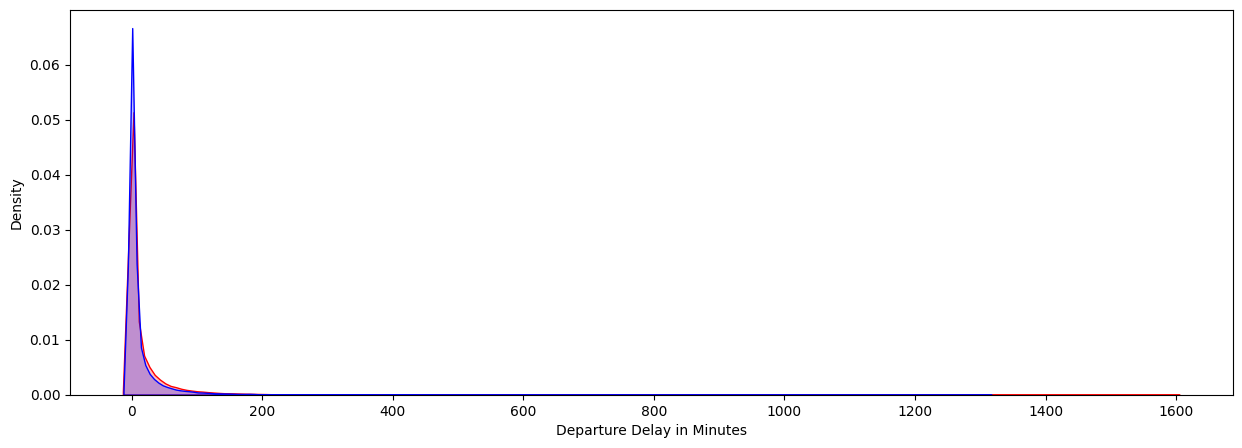

In [28]:
fig = plt.figure(figsize=(15,5))
ax=sns.kdeplot(data.loc[(data['satisfaction'] == 'neutral or dissatisfied'), 'Departure Delay in Minutes'] , color='r',shade=True)
ax=sns.kdeplot(data.loc[(data['satisfaction'] == 'satisfied'),'Departure Delay in Minutes'] , color='b',shade=True)


C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_13208\2261018357.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['satisfaction'] == 'neutral or dissatisfied'), 'Flight Distance'] , color='r',shade=True)
C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_13208\2261018357.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['satisfaction'] == 'satisfied'),'Flight Distance'] , color='b',shade=True)


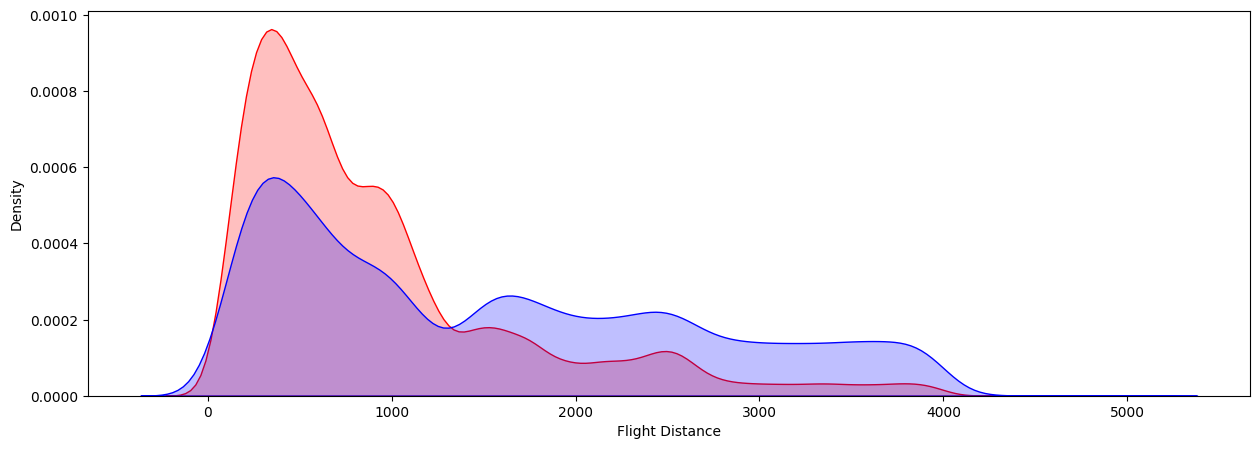

In [29]:
fig = plt.figure(figsize=(15,5))
ax=sns.kdeplot(data.loc[(data['satisfaction'] == 'neutral or dissatisfied'), 'Flight Distance'] , color='r',shade=True)
ax=sns.kdeplot(data.loc[(data['satisfaction'] == 'satisfied'),'Flight Distance'] , color='b',shade=True)

<Axes: xlabel='Ease of Online booking', ylabel='count'>

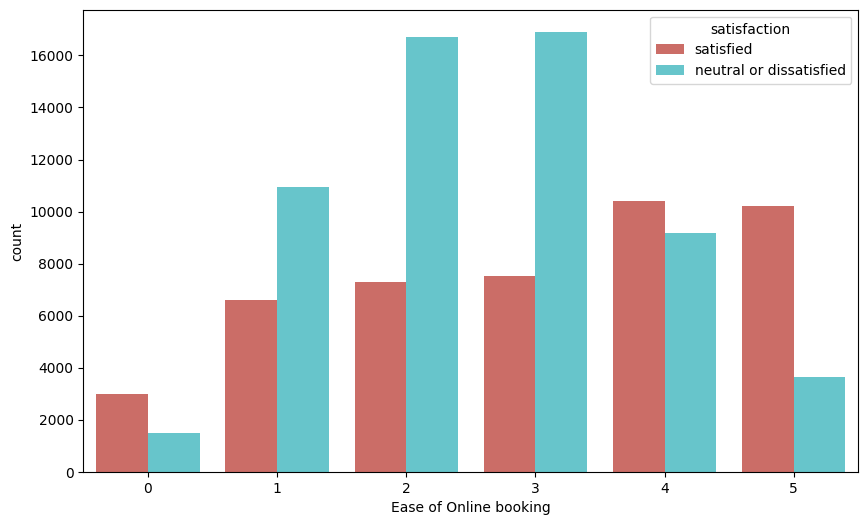

In [32]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Ease of Online booking',hue='satisfaction',palette='hls')


<Axes: xlabel='Checkin service', ylabel='count'>

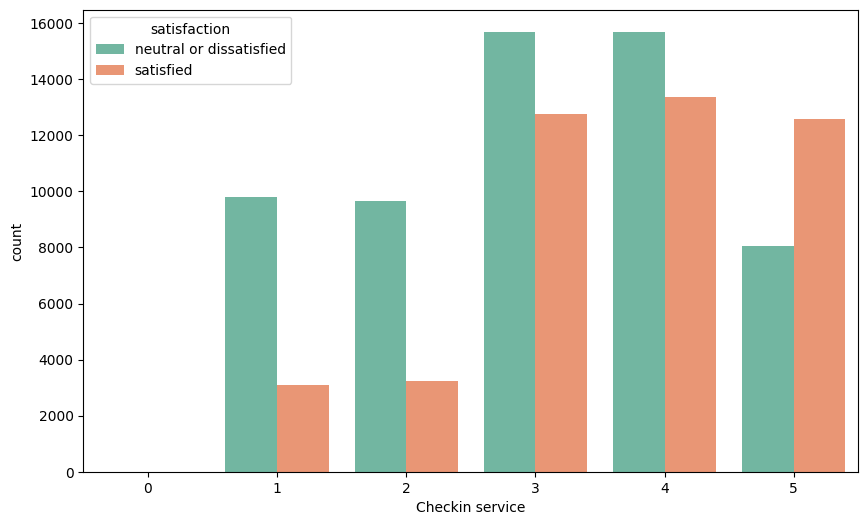

In [33]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Checkin service',hue='satisfaction',palette='Set2')


<Axes: xlabel='Online boarding', ylabel='count'>

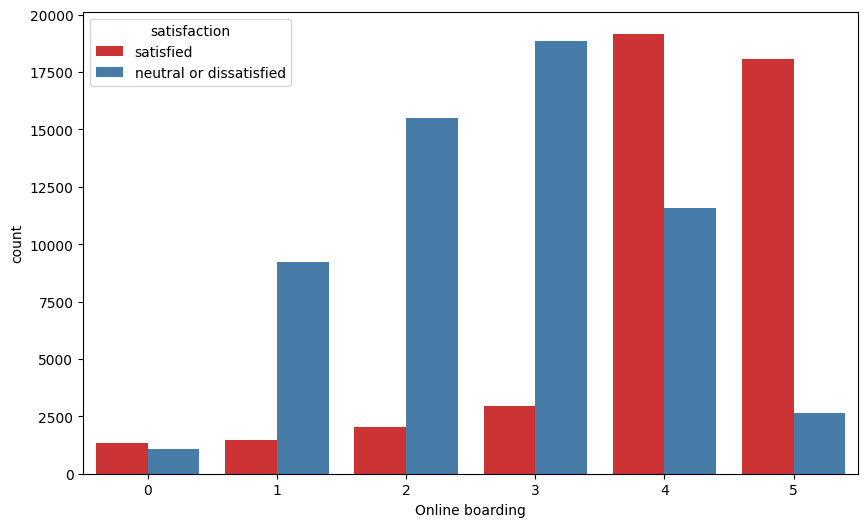

In [35]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Online boarding',hue='satisfaction',palette='Set1')


<Axes: xlabel='Gate location', ylabel='count'>

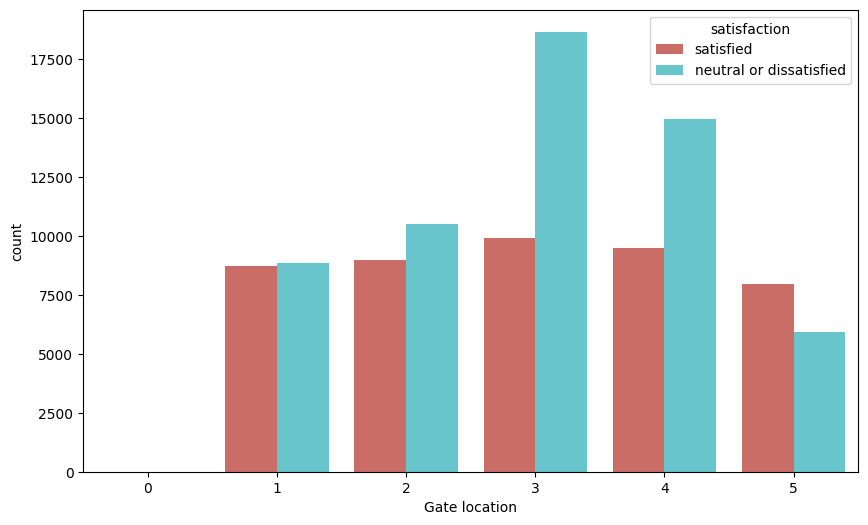

In [37]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Gate location',hue='satisfaction',palette='hls')


<Axes: xlabel='On-board service', ylabel='count'>

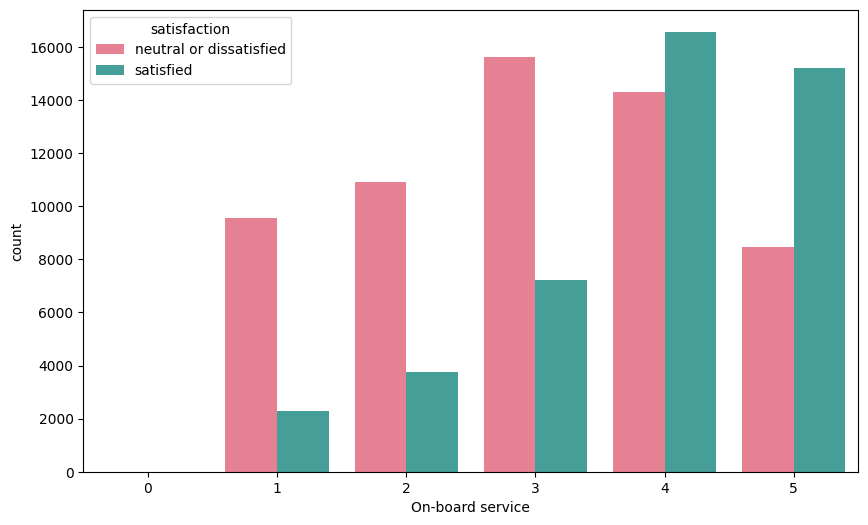

In [39]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='On-board service',hue='satisfaction',palette='husl')


<Axes: xlabel='Seat comfort', ylabel='count'>

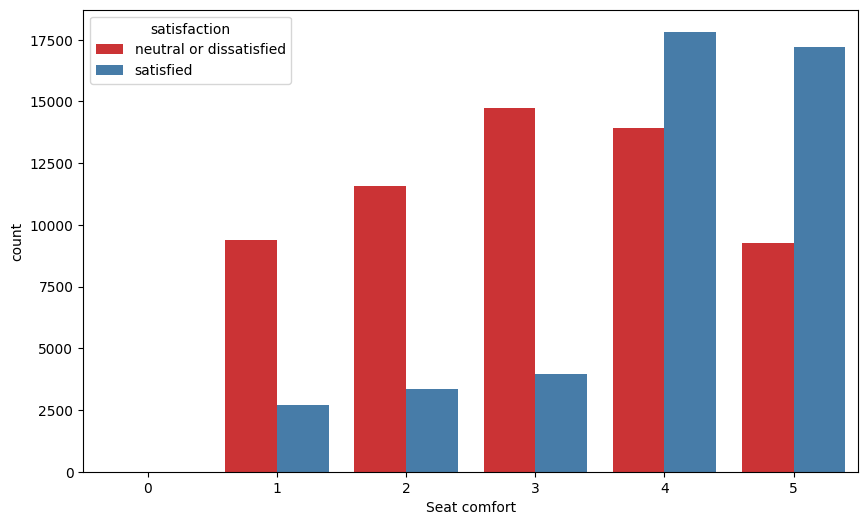

In [40]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Seat comfort',hue='satisfaction',palette='Set1')


<Axes: xlabel='Leg room service', ylabel='count'>

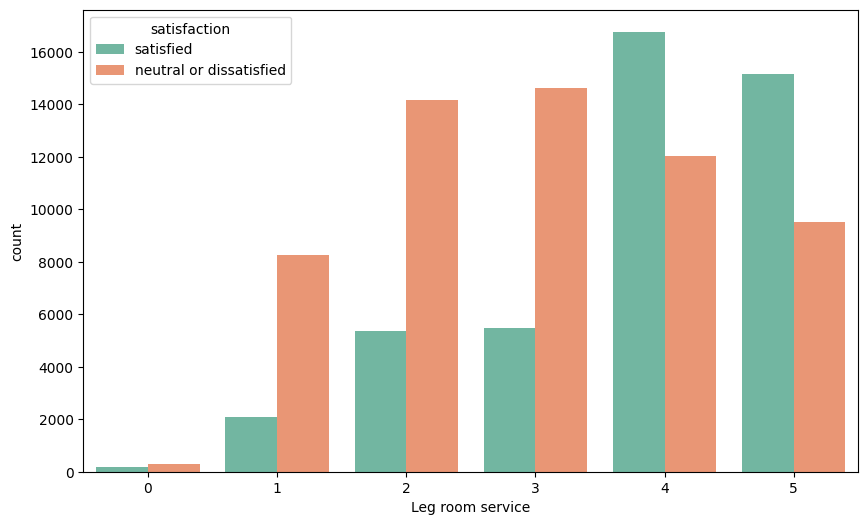

In [41]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Leg room service',hue='satisfaction',palette='Set2')


<Axes: xlabel='Cleanliness', ylabel='count'>

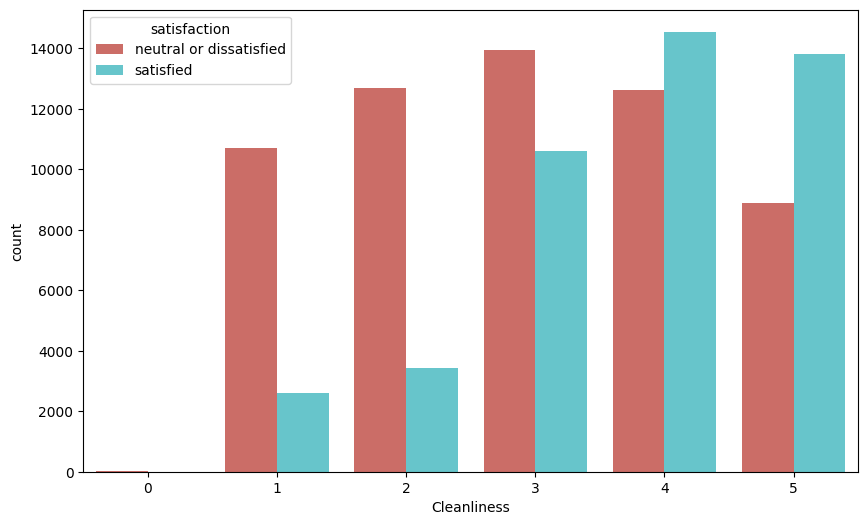

In [42]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Cleanliness',hue='satisfaction',palette='hls')


<Axes: xlabel='Food and drink', ylabel='count'>

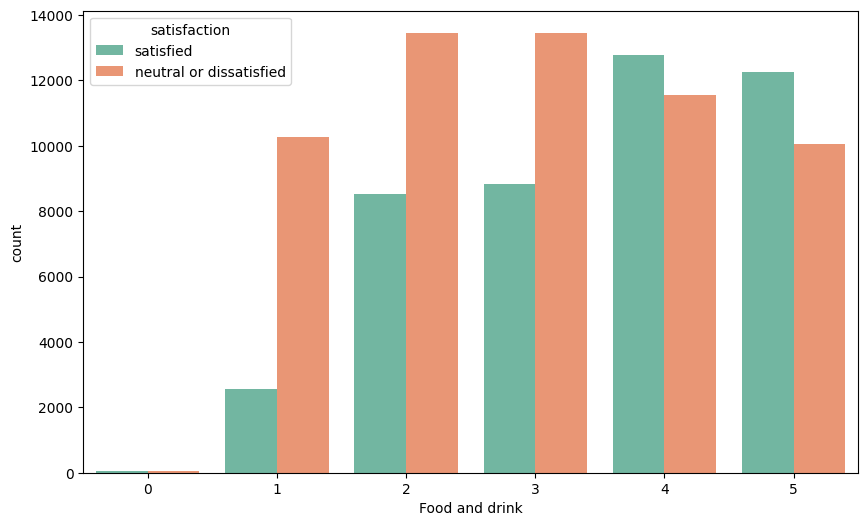

In [43]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Food and drink',hue='satisfaction',palette='Set2')


<Axes: xlabel='Inflight service', ylabel='count'>

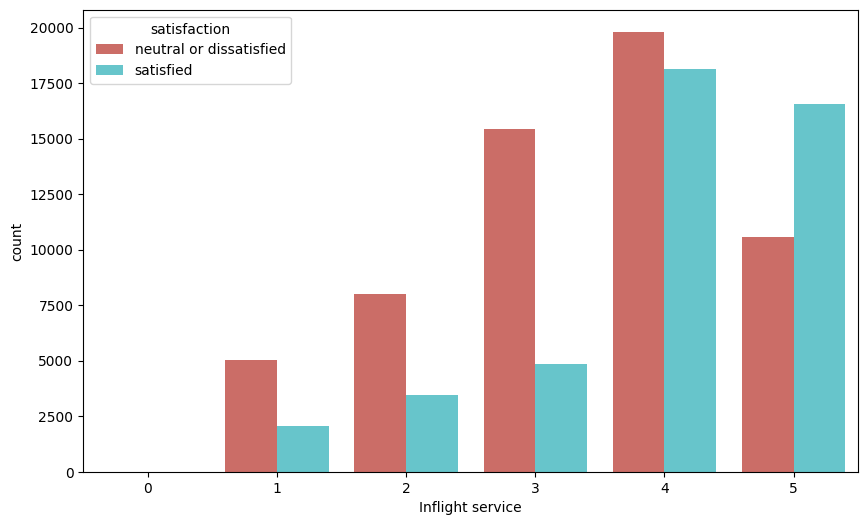

In [44]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Inflight service',hue='satisfaction',palette='hls')


<Axes: xlabel='Inflight wifi service', ylabel='count'>

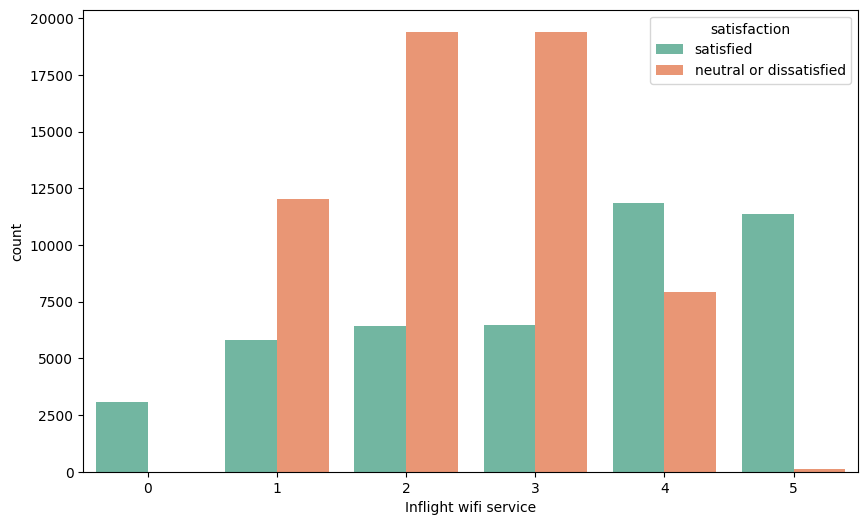

In [45]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Inflight wifi service',hue='satisfaction',palette='Set2')


<Axes: xlabel='Inflight entertainment', ylabel='count'>

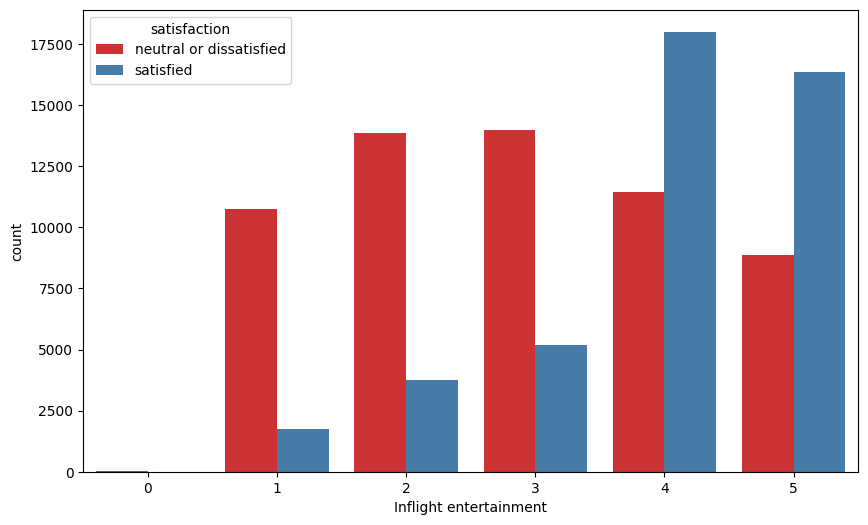

In [46]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Inflight entertainment',hue='satisfaction',palette='Set1')


<Axes: xlabel='Baggage handling', ylabel='count'>

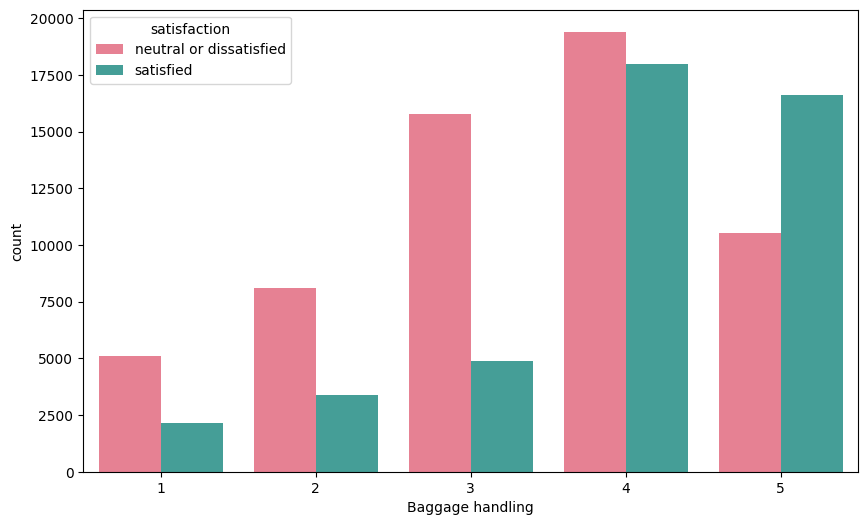

In [47]:
plt.figure(figsize = (10,6))
sns.countplot(data=data,x='Baggage handling',hue='satisfaction',palette='husl')


In [50]:
data["Gender"].value_counts()


Gender
Female    52727
Male      51177
Name: count, dtype: int64

In [51]:
data["Customer Type"].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [52]:
data["Type of Travel"].value_counts()

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

In [53]:
data['Class'].value_counts()

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

In [54]:
data["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [58]:
gender_le=LabelEncoder()
Customer_Type_le=LabelEncoder()
Type_of_Travel=LabelEncoder()
Class=LabelEncoder()
satisfaction=LabelEncoder()

In [60]:
data['Gender']=gender_le.fit_transform(data['Gender'])
data['Customer Type']=Customer_Type_le.fit_transform(data['Customer Type'])
data['Type of Travel']=Type_of_Travel.fit_transform(data['Type of Travel'])
data['Class']=Class.fit_transform(data['Class'])
data['satisfaction']=satisfaction.fit_transform(data['satisfaction'])

In [61]:
data.head(10)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,5,111157,0,0,26,1,1,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,0
6,6,82113,1,0,47,1,1,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,0
7,7,96462,0,0,52,0,0,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,1
8,8,79485,0,0,41,0,0,853,1,2,...,1,1,2,1,4,1,2,0,0.0,0
9,9,65725,1,1,20,0,1,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,0


In [62]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  int64  
 3   Customer Type                      103904 non-null  int64  
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  int64  
 6   Class                              103904 non-null  int64  
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Unnamed: 0                               Axes(0.125,0.77;0.133621x0.11)
id                                    Axes(0.285345,0.77;0.133621x0.11)
Gender                                 Axes(0.44569,0.77;0.133621x0.11)
Customer Type                         Axes(0.606034,0.77;0.133621x0.11)
Age                                   Axes(0.766379,0.77;0.133621x0.11)
Type of Travel                          Axes(0.125,0.638;0.133621x0.11)
Class                                Axes(0.285345,0.638;0.133621x0.11)
Flight Distance                       Axes(0.44569,0.638;0.133621x0.11)
Inflight wifi service                Axes(0.606034,0.638;0.133621x0.11)
Departure/Arrival time convenient    Axes(0.766379,0.638;0.133621x0.11)
Ease of Online booking                  Axes(0.125,0.506;0.133621x0.11)
Gate location                        Axes(0.285345,0.506;0.133621x0.11)
Food and drink                        Axes(0.44569,0.506;0.133621x0.11)
Online boarding                      Axes(0.606034,0.506;0.13362

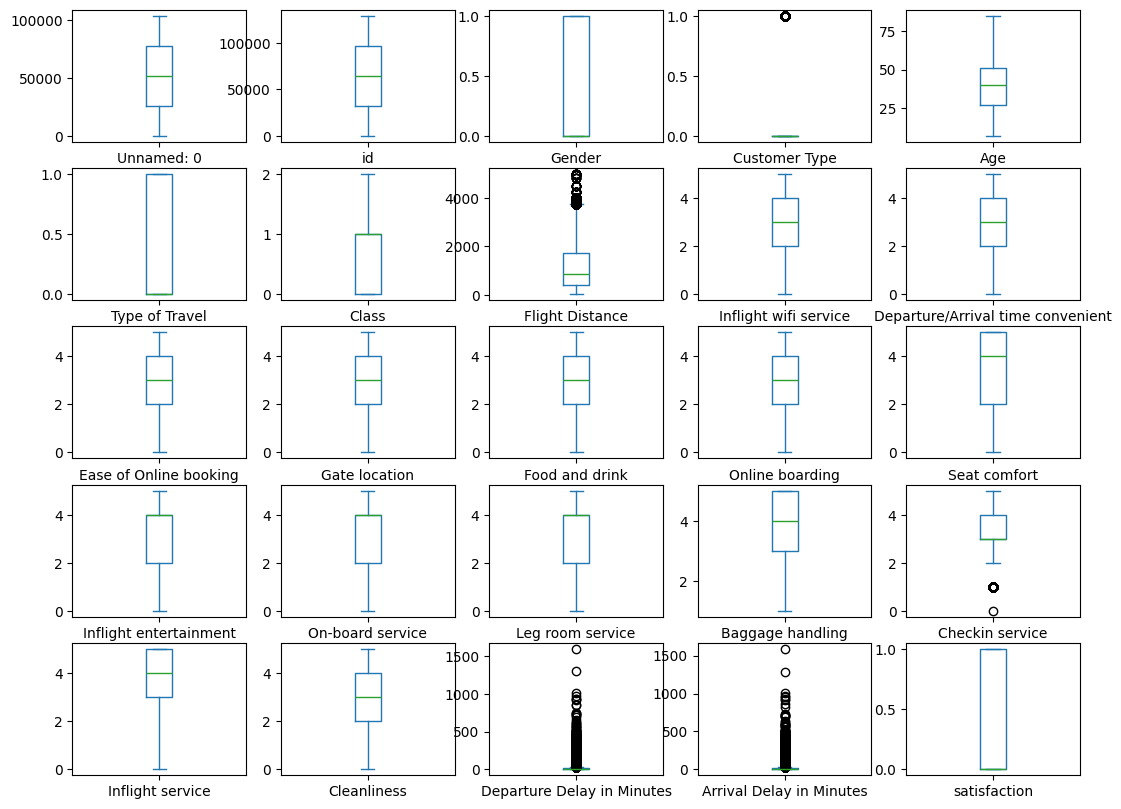

In [65]:
data.plot(kind="box", subplots=True, layout=(6,5), figsize=(13,12))


In [66]:
data.columns


Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

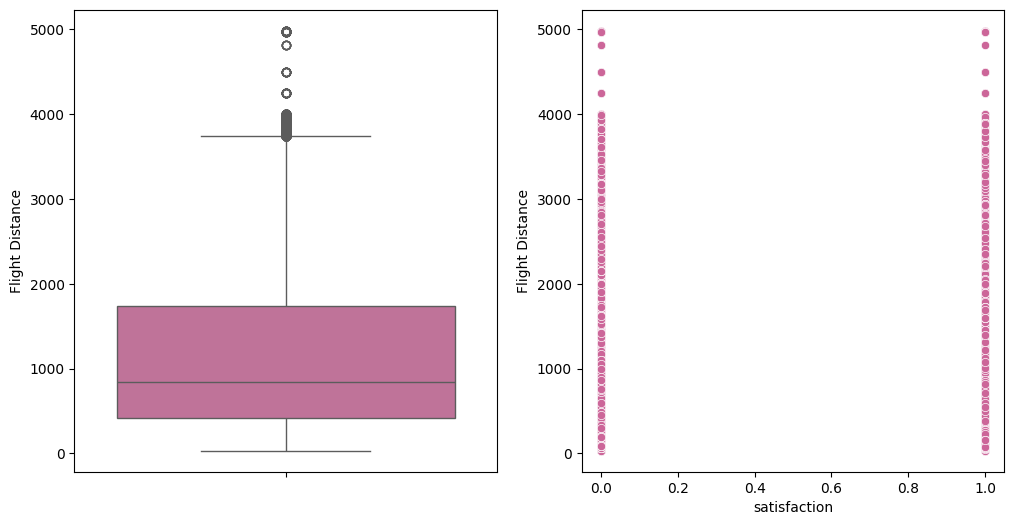

In [67]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data,y='Flight Distance',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=data,x='satisfaction',y='Flight Distance',color='#cc6699')
plt.show()


In [68]:
x=data[data['Flight Distance']>4000]
x.shape


(58, 25)

In [69]:
data=data[data['Flight Distance']<=4000]


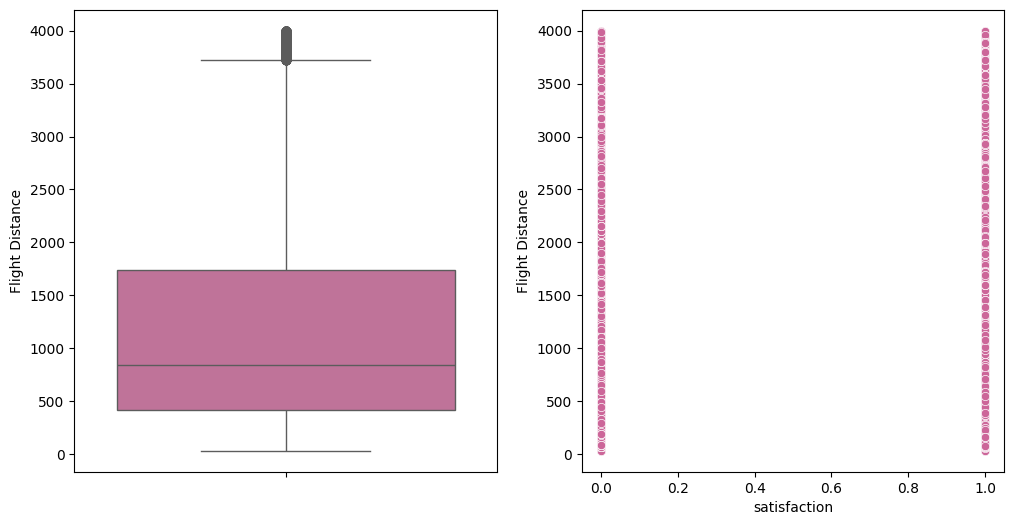

In [70]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data,y='Flight Distance',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=data,x='satisfaction',y='Flight Distance',color='#cc6699')
plt.show()

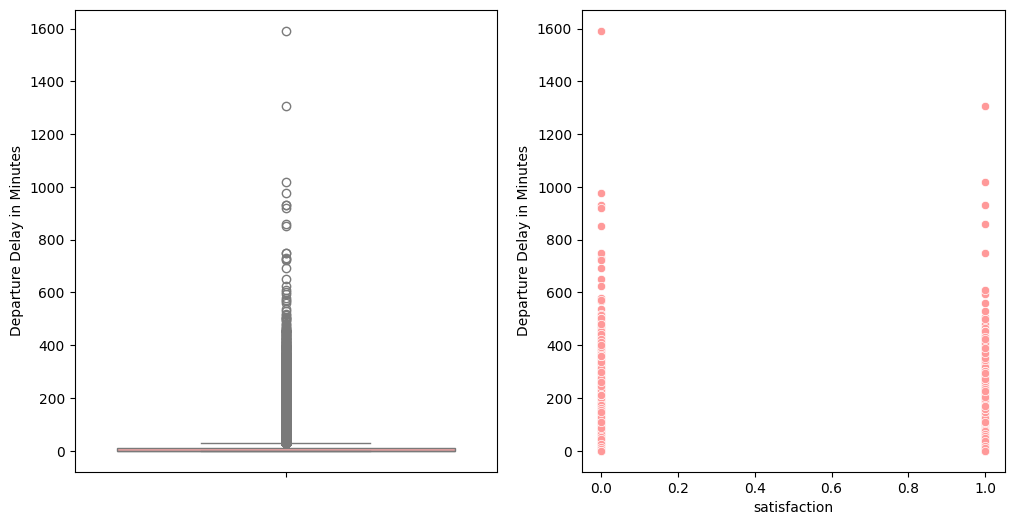

In [71]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data,y='Departure Delay in Minutes',color='#ff9999')
plt.subplot(1, 2, 2)
sns.scatterplot(data=data,x='satisfaction',y='Departure Delay in Minutes',color='#ff9999')
plt.show()

In [73]:
x=data[data['Departure Delay in Minutes']>600]
x.shape

(18, 25)

In [74]:
data=data[data['Departure Delay in Minutes']<=600]


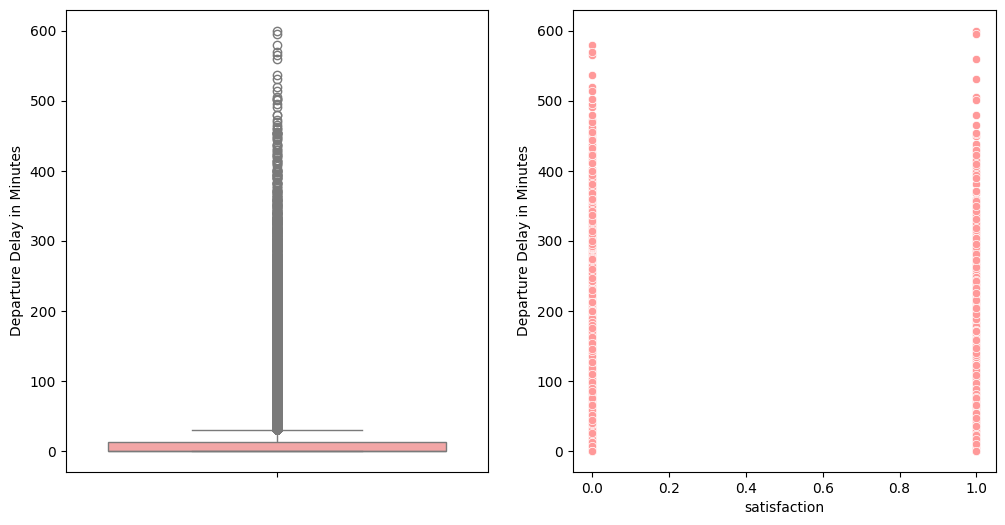

In [76]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data,y='Departure Delay in Minutes',color='#ff9999')
plt.subplot(1, 2, 2)
sns.scatterplot(data=data,x='satisfaction',y='Departure Delay in Minutes',color='#ff9999')
plt.show()

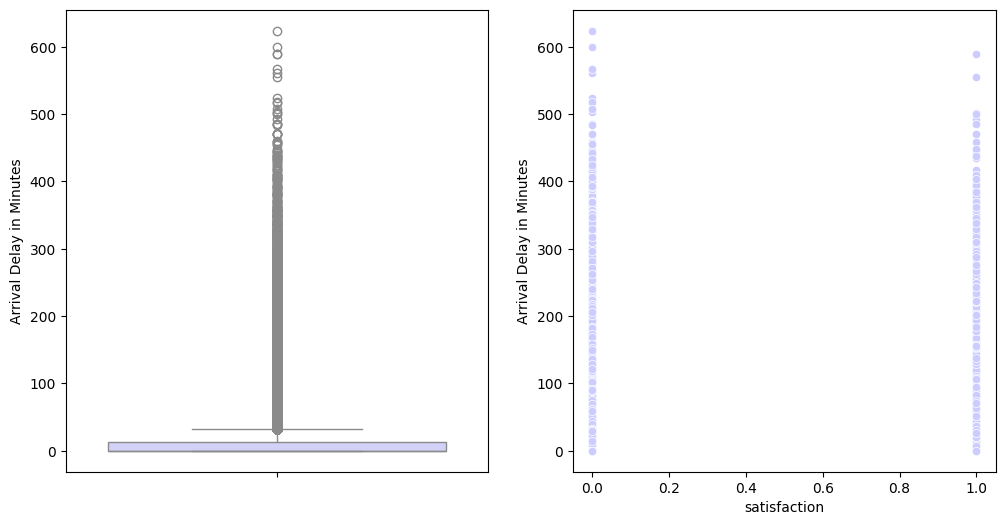

In [77]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data,y='Arrival Delay in Minutes',color='#ccccff')
plt.subplot(1, 2, 2)
sns.scatterplot(data=data,x='satisfaction',y='Arrival Delay in Minutes',color='#ccccff')
plt.show()

In [78]:
x=data[data['Arrival Delay in Minutes']>=500]
x.shape

(14, 25)

In [79]:
data=data[data['Arrival Delay in Minutes']<500]

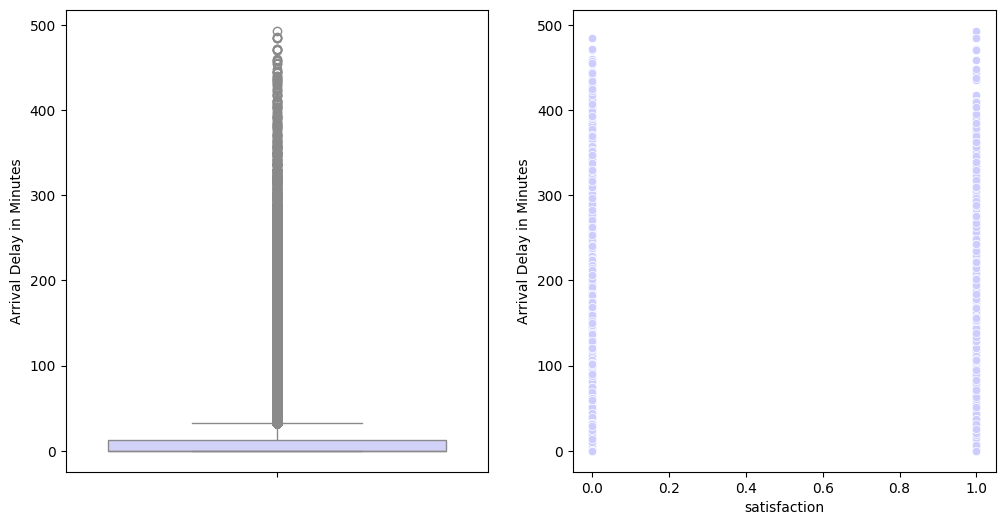

In [80]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data,y='Arrival Delay in Minutes',color='#ccccff')
plt.subplot(1, 2, 2)
sns.scatterplot(data=data,x='satisfaction',y='Arrival Delay in Minutes',color='#ccccff')
plt.show()

In [81]:
data.shape


(103814, 25)

In [82]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [84]:
data.drop('Unnamed: 0',axis=1,inplace=True)


C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_13208\2202594628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Unnamed: 0',axis=1,inplace=True)


In [85]:
data.drop('id',axis=1,inplace=True)


C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_13208\823931449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('id',axis=1,inplace=True)


In [86]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [88]:
data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [89]:
data.drop('Gate location',axis=1,inplace=True)
data.drop('Gender',axis=1,inplace=True)
data.drop('Flight Distance',axis=1,inplace=True)
data.drop('Departure Delay in Minutes',axis=1,inplace=True)
data.drop('Arrival Delay in Minutes',axis=1,inplace=True)

C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_13208\4070440327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Gate location',axis=1,inplace=True)
C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_13208\4070440327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Gender',axis=1,inplace=True)
C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_13208\4070440327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [90]:
data.head(3)

,Customer Type,Age,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,0,13,1,2,3,4,3,5,3,5,5,4,3,4,4,5,5,0
1,1,25,0,0,3,2,3,1,3,1,1,1,5,3,1,4,1,0
2,0,26,0,0,2,2,2,5,5,5,5,4,3,4,4,4,5,1


In [111]:
data.to_csv("passenger.csv",index=False)

In [91]:
x = data.drop(['satisfaction'] , axis = 1).values
y= data['satisfaction' ].values
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)

In [110]:
print(y.value_counts())


Series([], Name: count, dtype: int64)


In [112]:
print(data['satisfaction'].isna().sum())  # Count of missing values in the target column


0


In [123]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)
model = grid_search.best_estimator_


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'class_weight': None, 'max_depth': 30, 'n_estimators': 200}


In [116]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.model_selection import train_test_split

# Ensure the experiment is set correctly
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Passenger Satisfaction Prediction")

# Assuming your data is in the 'data_train' variable
df = pd.read_csv(r"C:\Users\YAMINI RAVICHANDRAN\OneDrive\ドキュメント\Passenger Satisfaction\passenger.csv")
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# List of models to evaluate
models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), XGBClassifier(), DecisionTreeClassifier()]

# Start an MLflow run for each model
for model in models:
    with mlflow.start_run():
        # Log experiment info (print current experiment ID)
        print(f"Logging to experiment: {mlflow.active_run().info.experiment_id}")

        # Train the model
        model.fit(x_train, y_train)

        # Predictions
        train_prediction = model.predict(x_train)
        test_prediction = model.predict(x_test)
        
        # Metrics
        accuracy_score_train = accuracy_score(y_train, train_prediction)
        precision_score_train = precision_score(y_train, train_prediction)
        recall_score_train = recall_score(y_train, train_prediction)
        f1_score_train = f1_score(y_train, train_prediction)
        
        accuracy_score_test = accuracy_score(y_test, test_prediction)
        precision_score_test = precision_score(y_test, test_prediction)
        recall_score_test = recall_score(y_test, test_prediction)
        f1_score_test = f1_score(y_test, test_prediction)

        # Log model parameters and metrics
        mlflow.log_param("model_type", type(model).__name__)
        mlflow.log_param("test_size", 0.2)
        
        mlflow.log_metric("accuracy_score_train", accuracy_score_train)
        mlflow.log_metric("precision_score_train", precision_score_train)
        mlflow.log_metric("recall_score_train", recall_score_train)
        mlflow.log_metric("f1_score_train", f1_score_train)
        
        mlflow.log_metric("accuracy_score_test", accuracy_score_test)
        mlflow.log_metric("precision_score_test", precision_score_test)
        mlflow.log_metric("recall_score_test", recall_score_test)
        mlflow.log_metric("f1_score_test", f1_score_test)
        
        # Log the trained model as an artifact
        mlflow.sklearn.log_model(model, artifact_path=f"{type(model).__name__}_model")

        # Print results for monitoring
        print(f"{type(model).__name__}")
        print("****train****")
        print(f"accuracy_score_train: {accuracy_score_train}")
        print(f"precision_score_train: {precision_score_train}")
        print(f"r2 recall_score_train: {recall_score_train}")
        print(f"r2 f1_score_train: {f1_score_train}")
        print("****test****")
        print(f"accuracy_score_test: {accuracy_score_test}")
        print(f"precision_score_test: {precision_score_test}")
        print(f"recall_score_test: {recall_score_test}")
        print(f"f1_score_test: {f1_score_test}")
        print("\n")


2025/01/24 09:53:37 INFO mlflow.tracking.fluent: Experiment with name 'Passenger Satisfaction Prediction' does not exist. Creating a new experiment.


Logging to experiment: 737803450911328004


C:\Users\YAMINI RAVICHANDRAN\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/01/24 09:53:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LogisticRegression
****train****
accuracy_score_train: 0.8719581943625001
precision_score_train: 0.8610673465295483
r2 recall_score_train: 0.8386295789972937
r2 f1_score_train: 0.8497003618272275
****test****
accuracy_score_test: 0.8692867119395078
precision_score_test: 0.8593802438751538
recall_score_test: 0.8405733668891564
f1_score_test: 0.8498727735368957


🏃 View run persistent-doe-812 at: http://127.0.0.1:5000/#/experiments/737803450911328004/runs/cef6fcfa38db47a1acf8f74d778102ca
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/737803450911328004
Logging to experiment: 737803450911328004


2025/01/24 09:54:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForestClassifier
****train****
accuracy_score_train: 0.9998434696752598
precision_score_train: 0.9998325986273088
r2 recall_score_train: 0.9998047038473342
r2 f1_score_train: 0.9998186510427565
****test****
accuracy_score_test: 0.9623368492029091
precision_score_test: 0.9729485002829654
recall_score_test: 0.9405843090053616
f1_score_test: 0.9564927116946701


🏃 View run melodic-hen-677 at: http://127.0.0.1:5000/#/experiments/737803450911328004/runs/cf632f7ad132452c9d9b4416d79b5a74
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/737803450911328004
Logging to experiment: 737803450911328004


2025/01/24 09:57:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


KNeighborsClassifier
****train****
accuracy_score_train: 0.9385437863481475
precision_score_train: 0.9527498748048429
r2 recall_score_train: 0.9023519236671037
r2 f1_score_train: 0.9268663132253905
****test****
accuracy_score_test: 0.9135481385156288
precision_score_test: 0.9293732460243218
recall_score_test: 0.8696793959951855
f1_score_test: 0.8985359787462551


🏃 View run sophisticated-fly-47 at: http://127.0.0.1:5000/#/experiments/737803450911328004/runs/735eaabdb3ea48018a25a7eccb81ec5d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/737803450911328004
Logging to experiment: 737803450911328004


2025/01/24 09:57:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBClassifier
****train****
accuracy_score_train: 0.9727998458778341
precision_score_train: 0.9820024111602274
r2 recall_score_train: 0.9544680969784896
r2 f1_score_train: 0.9680395014218814
****test****
accuracy_score_test: 0.9638780523045802
precision_score_test: 0.9727262481686014
recall_score_test: 0.9444140496772075
f1_score_test: 0.9583610926049301


🏃 View run stately-crow-372 at: http://127.0.0.1:5000/#/experiments/737803450911328004/runs/9ea8ed079808465e8dbe10f2f6365b54
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/737803450911328004
Logging to experiment: 737803450911328004


2025/01/24 09:57:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


DecisionTreeClassifier
****train****
accuracy_score_train: 0.9998555104694705
precision_score_train: 1.0
r2 recall_score_train: 0.9996652065954301
r2 f1_score_train: 0.9998325752713676
****test****
accuracy_score_test: 0.9450464769060348
precision_score_test: 0.9366673946276479
recall_score_test: 0.9386147280884123
f1_score_test: 0.9376400502814669


🏃 View run bright-frog-789 at: http://127.0.0.1:5000/#/experiments/737803450911328004/runs/b7f665b89da5469087c2ad9714e81532
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/737803450911328004


In [128]:
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv(r"C:\Users\YAMINI RAVICHANDRAN\OneDrive\ドキュメント\Passenger Satisfaction\passenger.csv")

# Drop rows with missing target values
df = df.dropna(subset=['satisfaction'])

# Encode the target variable

# Handle missing values in features
for column in df.columns:
    if df[column].dtype == 'object':  # For categorical columns
        df[column] = df[column].fillna(df[column].mode()[0])
    else:  # For numeric columns
        df[column] = df[column].fillna(df[column].mean())

# Split features and target
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

# One-hot encode categorical features
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Random Forest model
model = RandomForestClassifier(class_weight='balanced',max_depth= 30, n_estimators=200, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Save the model and training columns
training_columns = X_train.columns.tolist()
with open("passenger_satisfaction.pkl", "wb") as file:
    pickle.dump((model, training_columns), file)

print("Model and training columns saved as passenger_satisfaction.pkl")


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     11688
           1       0.97      0.94      0.95      9075

    accuracy                           0.96     20763
   macro avg       0.96      0.96      0.96     20763
weighted avg       0.96      0.96      0.96     20763

ROC-AUC Score: 0.9933590525376973
Model and training columns saved as passenger_satisfaction.pkl


In [119]:
print(df['satisfaction'].value_counts(normalize=True))


satisfaction
0    0.566706
1    0.433294
Name: proportion, dtype: float64
